In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

for dirname, _, filenames in os.walk("./"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# 1. Frame the problem
Using the customer description, Define the problem your trying to solve in your own words (remember this is not technial but must be specific so the customer understands the project

The problem that we are trying to solve is that customers want to have a model that looks at the features of a housing unit in Oklahoma City, Oklahoma such as the number of rooms, the number of bathrooms, square footage, age, and zip code. Then, uses these features to consistently predict an accurate price for that house.

# 2. Get the Data 
Define how you recieved the data (provided, gathered..)

I gathered the data using the Zillow ZIP Code Search Scraper by Maximillian Copelli on console.apify.com to scrape the Zillow website for the specific information I was searching for. I entered all the zip codes in Oklahoma City, Oklahoma and selected the data I wanted the scraper to find such as number of houses, number of bathrooms, square footage, age, and zip code. Then, I ran the scraper and got about 1700 results that I will split into a training and testing data test.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


file_path_okc = "Project_2/OKC.csv"
df_okc = pd.read_csv("OKC.csv")

print(df_okc.head())
print(df_okc.head())

# 3. Explore the Data
Gain insights into the data you have from step 2, making sure to identify any bias

After creating different types of graph that show the relationship between individual features and the price of the house I have found multiple patterns. Using correlation heatmaps I've found that square footage has the strongest positive correlation with price, baths had a moderate positive correlation with price, and beds had a weaker positive correlation with price. Using scatterplots I've discovered that price vs. area has a clear upward trend as prices rise steadily with square footage, price vs beds have a upward trend with a lot of scatter, and price vs beds had a clearer upward slope as adding bathrooms adds value consistently. Using boxplots by Zip Code I have discovered that some zip codes have a significantly higher median price than others, which shows that location is a key factor.

In [ ]:
sns.set(style="whitegrid")

# Scatterplots
plt.figure(figsize=(6,4))
sns.scatterplot(data=df_okc, x="beds", y="unformattedPrice", alpha=0.6)
plt.title("House Price vs Bedrooms")
plt.show()

plt.figure(figsize=(6,4))
sns.scatterplot(data=df_okc, x="baths", y="unformattedPrice", alpha=0.6)
plt.title("House Price vs Bathrooms")
plt.show()

plt.figure(figsize=(6,4))
sns.scatterplot(data=df_okc, x="area", y="unformattedPrice", alpha=0.6)
plt.title("House Price vs Square Footage")
plt.show()

plt.figure(figsize=(6,4))
sns.scatterplot(data=df_okc, x="House_Age", y="unformattedPrice", alpha=0.6)
plt.title("House Price vs House Age")
plt.show()

# Boxplot by Zip Code
plt.figure(figsize=(10,6))
sns.boxplot(data=df_okc, x="addressZipcode", y="unformattedPrice")
plt.xticks(rotation=45)
plt.title("House Price Distribution by Zip Code")
plt.show()

# Correlation Heatmap
plt.figure(figsize=(8,6))
corr = df_okc[["beds","baths","area","House_Age","unformattedPrice"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()

# 4.Prepare the Data


Apply any data transformations and explain what and why


I checked for any missing values in each row and dropped the whole row if there was any missing values. Then, I dropped irrelevant columns like addresses, row numbers, and the city.
Next, I encoded categorical variables like zip codes, so they are not confused as numerical values. Finally, I assigned the price of the house as the target variable, and the beds, baths, area, age, and zip code as features to predict the target variable. This makes sure the model can recognize patterns, so that it trains effectively.

In [ ]:
# Handle missing values
df_okc = df_okc.dropna(subset=["unformattedPrice", "beds", "baths", "area", "House_Age", "addressZipcode"])

# Keep only useful columns
df_model = df_okc[["beds", "baths", "area", "House_Age", "addressZipcode", "unformattedPrice"]]

# Encode categorical variable (zip code)
df_model = pd.get_dummies(df_model, columns=["addressZipcode"], drop_first=True)

# Define features (X) and target (y)
X = df_model.drop("unformattedPrice", axis=1)
y = df_model["unformattedPrice"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Model the data
Using selected ML models, experment with your choices and describe your findings. Finish by selecting a Model to continue with


# 6. Fine Tune the Model

With the select model descibe the steps taken to acheve the best rusults possiable 


# 7. Present
In a customer faceing Document provide summery of finding and detail approach taken


# 8. Launch the Model System
Define your production run code, This should be self susficent and require only your model pramaters 


In [ ]:
def infrence(prams):
    results = m.run(prams)
    return results 

In [1]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


file_path_okc = "Project_2/OKC.csv"
df_okc = pd.read_csv("OKC.csv")


print("Missing values before cleaning:\n", df_okc.isnull().sum())
df_okc = df_okc.dropna(subset=["unformattedPrice", "beds", "baths", "area", "House_Age", "addressZipcode"])


df_model = df_okc[["beds", "baths", "area", "House_Age", "addressZipcode", "unformattedPrice"]]


df_model = pd.get_dummies(df_model, columns=["addressZipcode"], drop_first=True)


X = df_model.drop("unformattedPrice", axis=1)
y = df_model["unformattedPrice"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(" Data preparation complete!")
print("Training set shape:", X_train_scaled.shape)
print("Testing set shape:", X_test_scaled.shape)


Missing values before cleaning:
 Row_Number            0
addressZipcode        0
baths               187
beds                189
area                186
addressCity           0
unformattedPrice      0
House_Age             0
dtype: int64
✅ Data preparation complete!
Training set shape: (1193, 42)
Testing set shape: (299, 42)


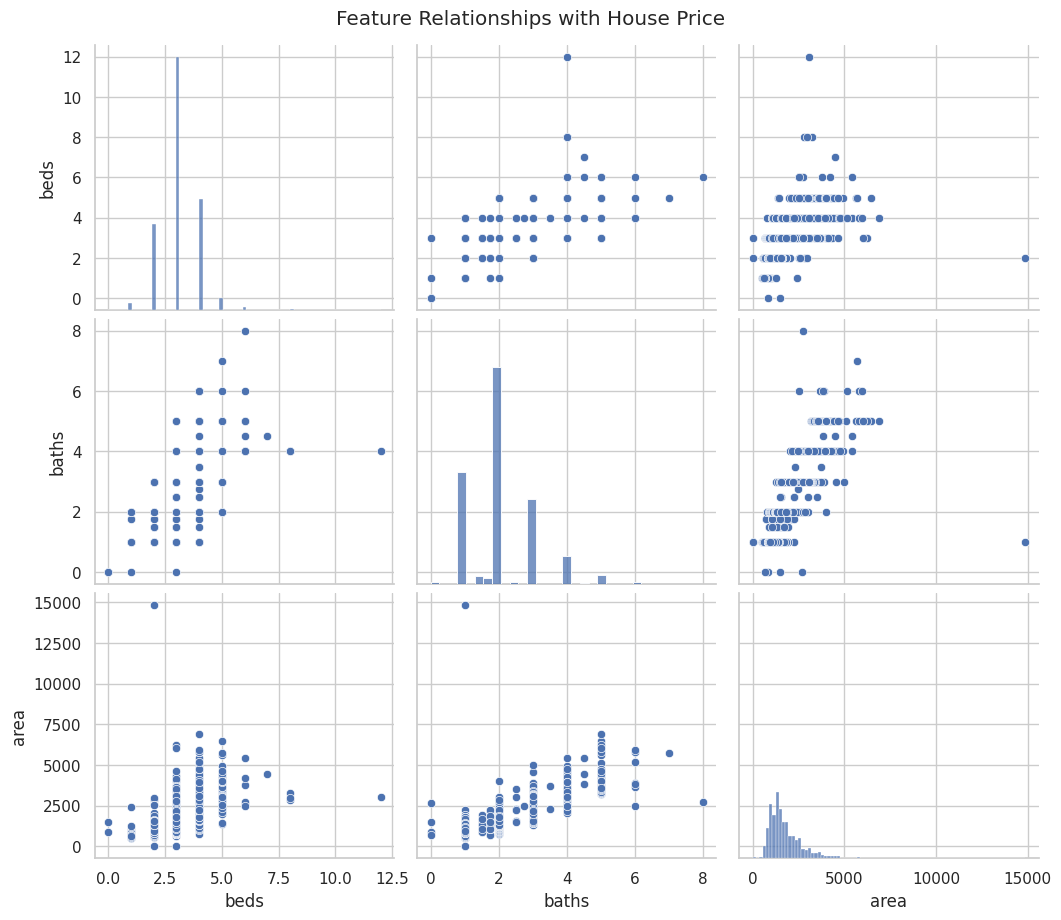

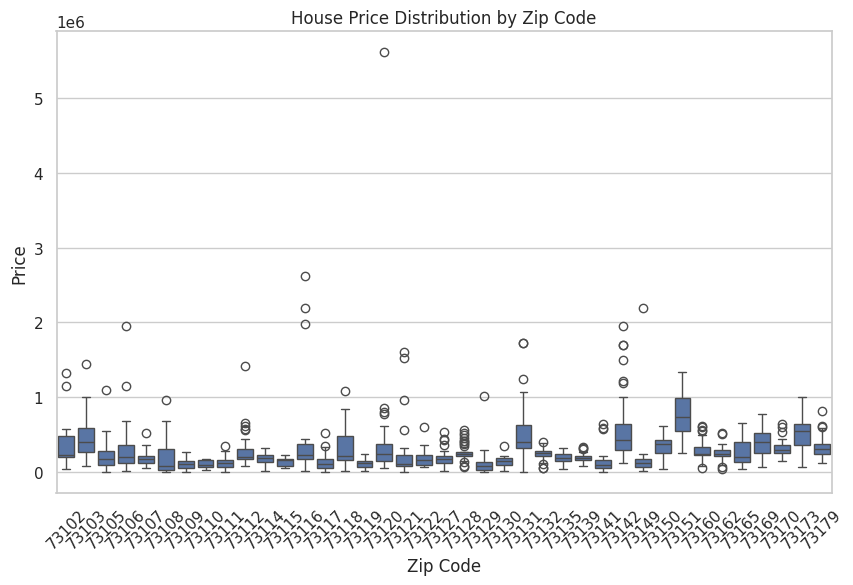

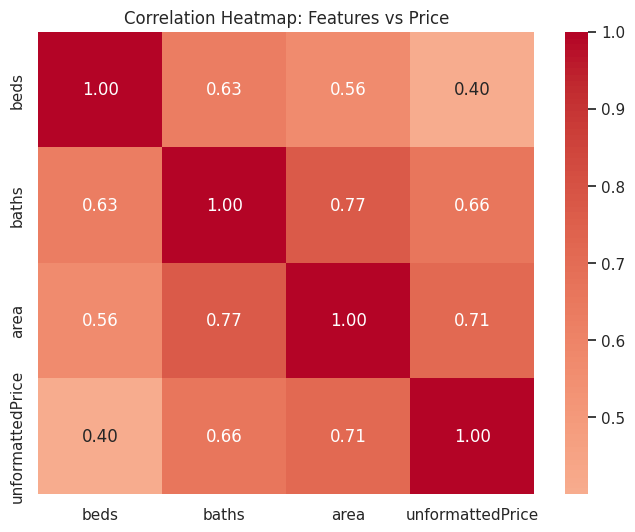

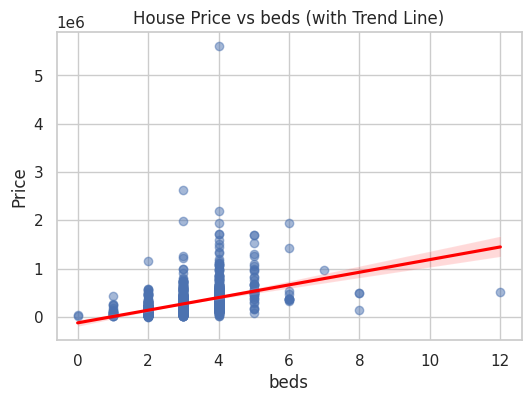

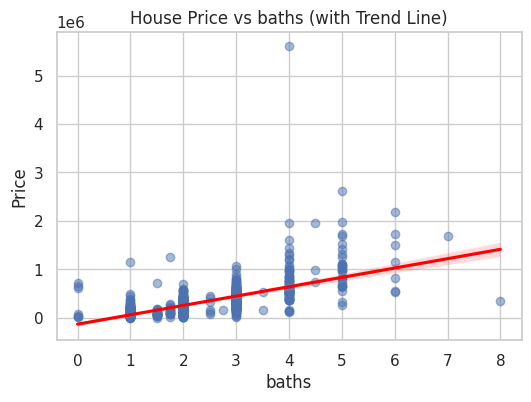

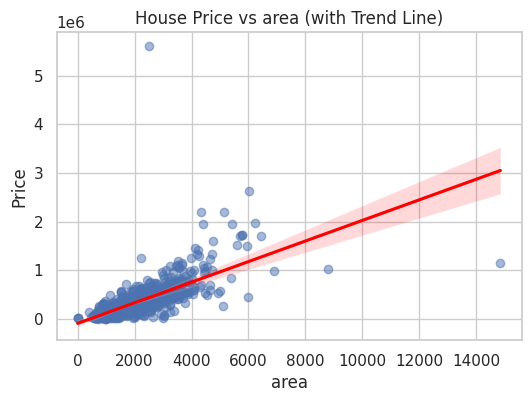

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path_okc = "Project_2/OKC.csv"
df_okc = pd.read_csv("OKC.csv")

df_model = df_okc[["beds", "baths", "area", "House_Age", "addressZipcode", "unformattedPrice"]]



sns.set(style="whitegrid")

# Pairplot
sns.pairplot(df_model, vars=["beds", "baths", "area"], 
             y_vars="unformattedPrice", height=3, aspect=1.2)
plt.suptitle("Feature Relationships with House Price", y=1.02)
plt.show()

# Boxplot-price distribution by zip code
plt.figure(figsize=(10,6))
sns.boxplot(data=df_model, x="addressZipcode", y="unformattedPrice")
plt.xticks(rotation=45)
plt.title("House Price Distribution by Zip Code")
plt.xlabel("Zip Code")
plt.ylabel("Price")
plt.show()

# Correlation Heatmap
plt.figure(figsize=(8,6))
corr = df_model[["beds","baths","area","unformattedPrice"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0, fmt=".2f")
plt.title("Correlation Heatmap: Features vs Price")
plt.show()

# Scatterplots
features = ["beds", "baths", "area"]
for feature in features:
    plt.figure(figsize=(6,4))
    sns.regplot(data=df_model, x=feature, y="unformattedPrice", scatter_kws={"alpha":0.5}, line_kws={"color":"red"})
    plt.title(f"House Price vs {feature} (with Trend Line)")
    plt.xlabel(feature)
    plt.ylabel("Price")
    plt.show()
